### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

There are many null values to clean up. The "car" attribute is particularly full of missing values (12576 out of 12684) and will likely not be useful in this analysis.

In [7]:
data.car.value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [8]:
pd.set_option('display.max_columns', None)
data[data.Bar.isnull()].head(8)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
852,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,0,Bachelors degree,Unemployed,$87500 - $99999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
853,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,41,Married partner,0,Bachelors degree,Unemployed,$87500 - $99999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1


3. Decide what to do about your missing data -- drop, replace, other...

All null values in our dataframe appear to represent missing data. I will replace all null values with the string "unknown." These values will be ignored when doing our analysis.

In [9]:
data.fillna("unknown", inplace=True)
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [73]:
data['Y'].sum() / len(data.index) 

0.5684326710816777

56.8% of observations accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

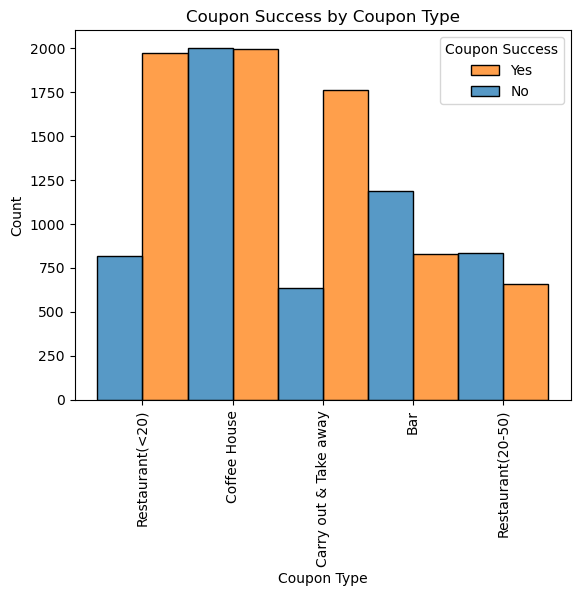

In [15]:
sns.histplot(data, x='coupon', hue='Y', multiple="dodge")
plt.xlabel("Coupon Type")
plt.title("Coupon Success by Coupon Type")
plt.legend(title = "Coupon Success", labels=["Yes", "No"])
plt.xticks(rotation = 90)

Some coupon types are much more successful than others. It appears that cheap restaurants and carry-out restaurants have the highest probability of success. Bars have the lowest probability.

6. Use a histogram to visualize the temperature column.

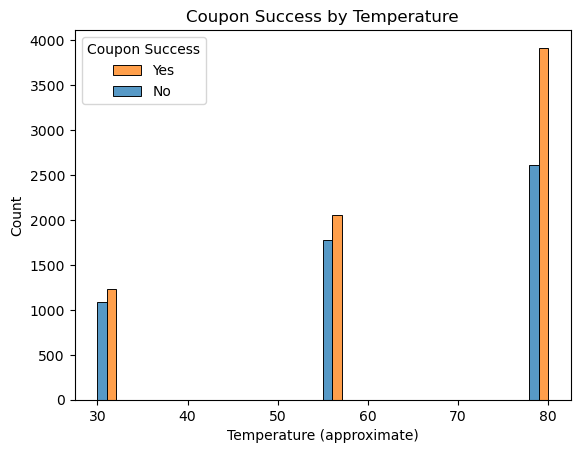

In [17]:
sns.histplot(data, x='temperature', hue='Y', multiple="dodge")
plt.title("Coupon Success by Temperature")
plt.xlabel("Temperature (approximate)")
plt.legend(title = "Coupon Success", labels=["Yes", "No"])

It appears from the histogram that only three discrete temperatures were recorded, and warm weather positively correlates with users' acceptance of coupons.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


First, we will get the exact string value that corresponds to a bar coupon. 

In [134]:
data.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

Next, we assign to the "bardata" dataframe all rows where the coupon column has a value of "Bar".

In [135]:
bardata = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [138]:
bardata['Y'].mean()

0.41001487357461575

Bar coupons were accepted 41% of the time.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [50]:
bardata.Bar.value_counts()

never      830
less1      570
1~3        397
4~8        150
gt8         49
unknown     21
Name: Bar, dtype: int64

In [139]:
bardata.query("Bar == '4~8' or Bar == 'gt8'")['Y'].mean() 

0.7688442211055276

In [140]:
bardata.query("Bar == 'never' or Bar == 'less1' or Bar == '1~3'")['Y'].mean()

0.37061769616026713

People who went to a bar more than 3 times per month were far more likely (76.9%) to accept a coupon than those that went 3 or fewer times per month (37.1%).


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


First, let's clean the "age" column and convert it to integers.

In [141]:
bardata.age.value_counts()

21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64

In [142]:
bardata = bardata.convert_dtypes()
bardata['age'] = bardata['age'].str.replace("below21","20")
bardata['age'] = bardata['age'].str.replace("50plus","50")
bardata['age'] = bardata['age'].astype('int64')

In [144]:
bardata.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age > 25)")['Y'].mean()

0.6952380952380952

In [145]:
bardata.query("Bar == 'never' or Bar == 'less1' or age <= 25")['Y'].mean()

0.33417882054533926

People over 25 who went to a bar more than 1 time per month were far more likely (69.5%) to accept a bar coupon than all others (33.4%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


First, we will get the string values for "passanger"(sic) and "occupation".

In [128]:
bardata.passanger.value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: Int64

In [129]:
bardata.occupation.value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Healthcare Support                            44
Community & Social Services                   44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [158]:
bardata.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger == 'Partner' or passanger == 'Friend(s)') and (occupation != 'Farming Fishing & Forestry')")['Y'].mean()

0.717948717948718

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted coupons 71.8% of the time.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



First we will calculate the acceptance rates for the three bullet points individually.

In [157]:
bardata.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger == 'Partner' or passanger == 'Friend(s)') and (maritalStatus != 'Widowed')")['Y'].mean()

0.717948717948718

In [154]:
bardata.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age < 30)")['Y'].mean()

0.7217391304347827

In [155]:
bardata.query("(RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income == 'Less than $12500' or income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999')")['Y'].mean()

0.45348837209302323

Now we will combine these three queries with "OR" clauses.

In [156]:
bardata.query("((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passanger == 'Partner' or passanger == 'Friend(s)') and (maritalStatus != 'Widowed')) or ((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age < 30)) or ((RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income == 'Less than $12500' or income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999'))")['Y'].mean()

0.5692771084337349

The acceptance rate for drivers for which one of these is true:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
- go to bars more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K.

...is 56.9%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above analysis, frequent bargoers were strongly correlated with accepting bar coupons. Young customers under 25 were less likely to accept.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

We will do a deeper dive on age. First we will create an "agedata" dataframe and convert "age" to integers so we can easily visualize.


In [177]:
agedata = data.convert_dtypes()
agedata['age'] = agedata['age'].str.replace("below21","16")
agedata['age'] = agedata['age'].str.replace("50plus","51")
agedata['age'] = agedata['age'].astype('int64')
agedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  string
 1   passanger             12684 non-null  string
 2   weather               12684 non-null  string
 3   temperature           12684 non-null  Int64 
 4   time                  12684 non-null  string
 5   coupon                12684 non-null  string
 6   expiration            12684 non-null  string
 7   gender                12684 non-null  string
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  string
 10  has_children          12684 non-null  Int64 
 11  education             12684 non-null  string
 12  occupation            12684 non-null  string
 13  income                12684 non-null  string
 14  car                   12684 non-null  string
 15  Bar                   12684 non-null

Next, we will create some plots to analyze age.

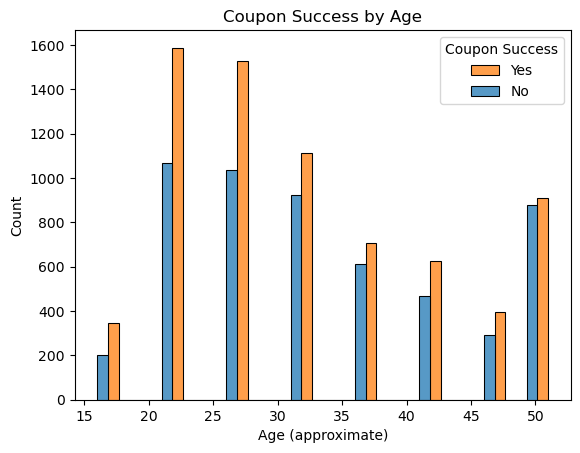

In [195]:
sns.histplot(agedata, x='age', hue='Y', multiple="dodge")
plt.title("Coupon Success by Age")
plt.xlabel("Age (approximate)")
plt.legend(title = "Coupon Success", labels=["Yes", "No"])

It appears that acceptance rates correlate negatively with age. Next we will analyze percentages of acceptance by age.

In [179]:
agedata.groupby('age')['Y'].mean()

age
16    0.634369
21    0.598191
26    0.595936
31    0.546346
36    0.535254
41    0.572736
46    0.575802
51    0.508949
Name: Y, dtype: Float64

The under 21 age range had the highest rate of acceptance, and over 50 had the lowest. There is a small dip in acceptance rates for people in their 30s, which could possibly be explained by their having kids. We will examine the effect of kids next.

In [180]:
agedata.has_children.value_counts()

0    7431
1    5253
Name: has_children, dtype: Int64

In [181]:
agedata.groupby('age')['has_children'].mean()

age
16    0.040219
21    0.138711
26    0.225479
31    0.485532
36    0.617892
41    0.802379
46    0.558309
51    0.682886
Name: has_children, dtype: Float64

In [182]:
agedata.groupby('has_children')['Y'].mean()

has_children
0    0.587404
1    0.541595
Name: Y, dtype: Float64

Having children had less effect than expected. There is a slightly lower acceptance rate for those who have children, but it is less than 5% different. The peak age for having children is later (41) than the dip in acceptance rates (30s) Next we will check the effects of having kids in the car.

In [184]:
agedata.passanger.value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: Int64

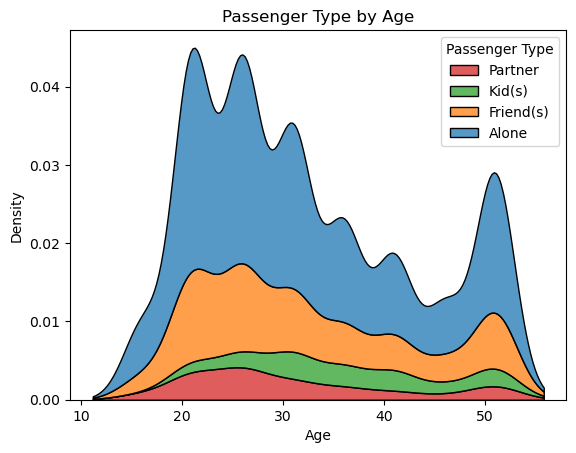

In [219]:
sns.kdeplot(data=agedata, x='age', hue='passanger', multiple='stack')
plt.title("Passenger Type by Age")
plt.xlabel("Age")
plt.legend(title = "Passenger Type", labels=['Partner', 'Kid(s)', 'Friend(s)', 'Alone'])

It does appear that the prime ages for having kids in the car are 31-41, with a dip around 46 and another bump over 50. This over 50 bump likely because of grandchildren. To "zoom in" on people with kids in the car, we will isolate those drivers in the next plot.

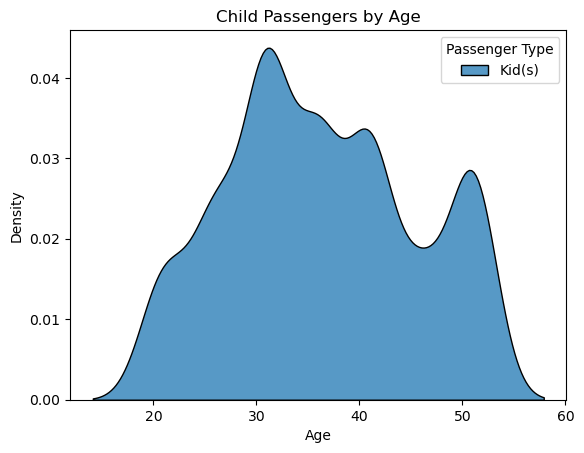

In [221]:
sns.kdeplot(data=agedata[agedata['passanger'] == 'Kid(s)'], x='age', hue='passanger', multiple='stack')
plt.title("Child Passengers by Age")
plt.xlabel("Age")
plt.legend(title = "Passenger Type", labels=['Kid(s)'])

This plot fits our expectations, and shows a peak at 31 and a secondary peak over 50. Now we will look at acceptance rates by kids in the car.

In [214]:
agedata.groupby('passanger')['Y'].mean()

passanger
Alone        0.525804
Friend(s)    0.673438
Kid(s)        0.50497
Partner      0.595349
Name: Y, dtype: Float64

Those with kids in the car were the least likely to accept coupons, which helps explain the results of the acceptances by age. Below we can see a pronounced decline in acceptance for 31 year olds with kids in the car. This is the age most likely to have small children, which may make them least likely to improvise.

In [225]:
agedata.query('passanger == "Kid(s)"').groupby('age')['Y'].mean()

age
21    0.658824
26    0.603306
31    0.433628
36    0.482143
41    0.476471
46     0.56962
51    0.471338
Name: Y, dtype: Float64

Finally, we will check the types of coupons 31 years with kids in the car accept.

In [261]:
agedata.query('passanger == "Kid(s)" and age==31').groupby(['coupon'])['Y'].mean()

coupon
Bar                      0.136364
Carry out & Take away    0.647059
Coffee House             0.372549
Restaurant(20-50)             0.3
Restaurant(<20)          0.684211
Name: Y, dtype: Float64

Coupons for cheap restaurants and carry out food have a high acceptance rate for 31 year olds with kids in the car. Unsurprisingly, coupons for bars with this group have a low acceptance rate.